In [2]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import plotly.graph_objects as go
from pyvis.network import Network

#import pygraphviz



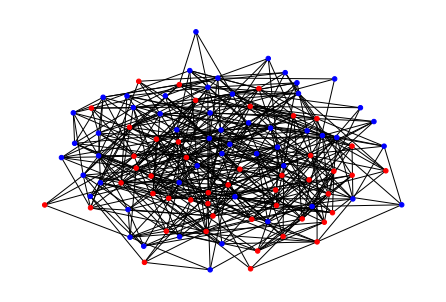

In [57]:

n = 100

G = nx.erdos_renyi_graph(n, 0.1)
initial_nodes = list(G.nodes())

SES_list = np.random.choice(['High', 'Low'], n, p=[0.5,0.5])
nodes = [i for i in range(n)]
SES_dict = {node: {'SES': SES_list[node]} for node in nodes}


nx.set_node_attributes(G, SES_dict)


colormap = ['blue' if SES == 'High' else 'red' for SES in SES_list]
nx.draw_kamada_kawai(G, node_color = colormap, node_size = 20)


{'Diameter': 4,
 'APL': 2.271313131313131,
 'Clustering': 0.10160236985236981,
 'Degree': (5.882352941176471, 24.92733564013841),
 'Degree histogram': [0, 0, 0, 2, 3, 7, 5, 7, 10, 12, 16, 14, 9, 9, 4, 1, 1],
 'Assortativity': -0.05801113807454355,
 'Degree-neighbour-clustering': 0.31704104293600827}

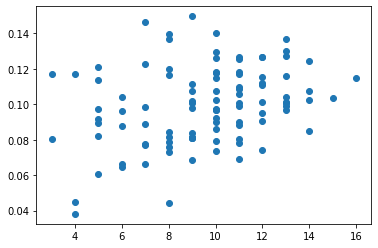

In [77]:

# negative correlation between a node's degrees and its neighbours' clustering
# need a function for this


def find_neighbours(graph, node_list):
    if len(node_list) != 0:
        all_neighbours_list = list(np.concatenate(([list(graph[node]) for node in node_list])))
    else:
        all_neighbours_list = []

    return all_neighbours_list



def degree_neighbour_clustering_corr(graph):
    nodes = list(graph.nodes())
    node_dict = {}
    
    # calculate degree and clustering at the beginning
    node_degree = dict(nx.degree(graph))
    node_clustering = dict(nx.clustering(graph))

    # iterate over nodes
    for node in nodes:
        # find the neighbours
        node_neighbours = find_neighbours(graph, [node])
        neighbour_clustering = []

        # get clustering for each neighbour and calculate the average
        for neighbour in node_neighbours:
            neighbour_clustering.append(node_clustering[neighbour])
        avg_neighbour_clustering = np.average(neighbour_clustering)

        # append to the dict: tuple with node's own degree, and its neighbours avg clustering
        node_dict[node] = (node_degree[node], avg_neighbour_clustering)

    # calculate correlation across the nodes
    data = np.transpose(list(node_dict.values()))
    corr = np.corrcoef(data)[0][1]


    return (corr, node_dict, data)


# returns a dict with the characteristics of social networks
def graph_social_network_chars(graph):
    degree_hist = nx.degree_histogram(graph)
    avg_degree = np.average(degree_hist)
    var_degree = np.var(degree_hist)

    small_world_char_dict = {
        'Diameter': nx.diameter(graph),     # low diameter
        'APL': nx.average_shortest_path_length(graph),      # relatively low APL (order of log n)
        'Clustering': nx.average_clustering(graph),     # relatively high clustering
        'Degree': (avg_degree, var_degree),     # fat degree tails
        'Degree histogram': degree_hist,
        #nx.degree_histogram(G) # returns a list a where a[x] = number of nodes with a degree of x, up until the highest amount     
        'Assortativity': nx.assortativity.degree_assortativity_coefficient(graph),      # assortativity: positive degree correlation
        'Degree-neighbour-clustering': degree_neighbour_clustering_corr(graph)[0]     # negative correlation between own degree and neighbours' clustering
    }

    return small_world_char_dict

data = degree_neighbour_clustering_corr(G)[2]

plt.scatter(data[0], data[1])

graph_social_network_chars(G)

